In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
import io

In [55]:
nf = int(input("Ingrese el número de filas: "))
nc = int(input("Ingrese el número de columnas: "))

In [56]:
matrix = np.zeros((nf, nc, 3))
colores = np.zeros((matrix.shape[0], matrix.shape[1], 3))

def graphic_(matrix, t, colores):
    fig, ax = plt.subplots()
    # Crear matriz de colores
    
    # Resaltar la fila y columna
    fila_resaltada = t[0]
    colores[fila_resaltada, :, :] = [1, 0.5, 0]
    columna_resaltada = t[1]
    colores[:, columna_resaltada, :] = [1, 0.5, 0.5]
    im = ax.imshow(colores)

    # Diagonal Principal
    start_row = t[0]
    start_col = t[1]
    while start_row < nf and start_col < nc:
        colores[start_row, start_col] = [1, 0.5, 1]
        start_row += 1
        start_col += 1
    im = ax.imshow(colores)

    # Diagonal Secundaria
    start_row = t[0]
    start_col = t[1]
    while start_row < nf and start_col >= 0:
        colores[start_row, start_col] = [0.5, 0.5, 1]
        start_row += 1
        start_col -= 1
    im = ax.imshow(colores)

    # Mostrar el gráfico
    fig.savefig('tensors.png', dpi=300, bbox_inches='tight')
    plt.show()


In [70]:
t = (np.random.randint(0, nf), np.random.randint(0, nc))
print("Tupla: ", t)

Tupla:  (24, 36)


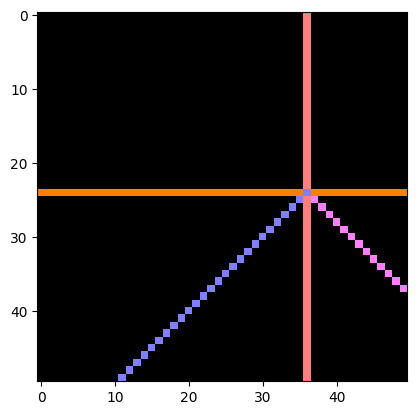

In [71]:
colores = np.zeros((matrix.shape[0], matrix.shape[1], 3))
graphic_(matrix, t, colores)

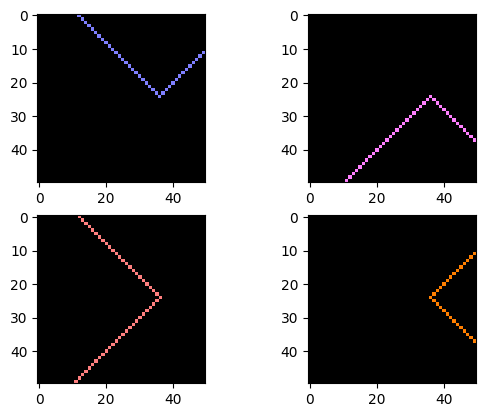

In [72]:
colores = np.zeros((matrix.shape[0], matrix.shape[1], 3))
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2)
iv = t[0]
jv = t[1]

def branch_12(iv, jv, colores):
    for j in range(nc):
        i = iv - abs(j-jv)
        if i >= 0:
            colores[i, j] = [0.5, 0.5, 1]
    im = ax1.imshow(colores)

branch_12(iv, jv, colores)

colores = np.zeros((matrix.shape[0], matrix.shape[1], 3))

def branch_34(iv, jv, colores):
    for j in range(nc):
        i = iv + abs(j-jv)
        if i < nf:
            colores[i, j] = [1, 0.5, 1]
    im = ax2.imshow(colores)

branch_34(iv, jv, colores)
colores = np.zeros((matrix.shape[0], matrix.shape[1], 3))

def branch_23(iv, jv, colores):
    for i in range(nf):
        j = jv - abs(i-iv)
        if j >= 0:
            colores[i, j] = [1, 0.5, 0.5]
    im = ax3.imshow(colores)


branch_23(iv, jv, colores)  
colores = np.zeros((matrix.shape[0], matrix.shape[1], 3))

def branch_14(iv, jv, colores):
    for i in range(nf):
        j = jv + abs(i-iv)
        if j < nc:
            colores[i, j] = [1, 0.5, 0]
    im = ax4.imshow(colores)

branch_14(iv, jv, colores)
fig.savefig('branches.png', dpi=300, bbox_inches='tight')
plt.show()



TENSORES CON IMÁGENES

In [3]:
url = "https://img2.freepng.es/20171128/334/autumn-red-leaf-png-clipart-image-5a1d63fa805255.6938363915118755785256.jpg"

# Obtener la imagen de la URL
response = requests.get(url)
image_bytes = io.BytesIO(response.content)

# Abrir la imagen con PIL
image = Image.open(image_bytes)

# Convertir la imagen a un arreglo NumPy
image_array = np.array(image)

# Imprimir las dimensiones del tensor resultante
print(image_array.shape)

(600, 900, 3)
